In [10]:
import matplotlib.pyplot as plt
import numpy as np
import data 
import models 
import plot_functions
from pymatreader import read_mat
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import LeaveOneOut, StratifiedKFold
#from keras.models import Sequential
#from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
import nnmodels
colorpalette = ['#2D3748','#738CB8', '#FCA311','#BFEDC1'] #'#DDFDFE', '#42F2F7', '#D1E3DD', '#D1E3DD']

In [11]:
main_path = "/mnt/projects/USS_MEP/COIL_ORIENTATION"
filelist = data.get_all_paths(main_path)
X, y, groups, list_subjects = data.get_all_data(filelist)

In [12]:
X_norm = data.normalize_X(X, groups)
X_amplitude, X_latency,X_ampl_late, X_diff,X_fft = data.other_X(X)

## Initial 

##### Checker, is any trial flat?

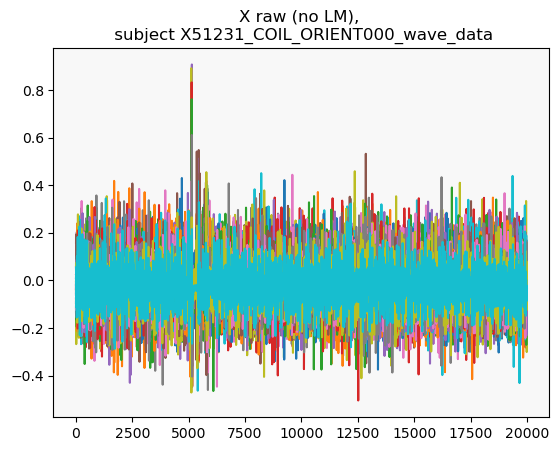

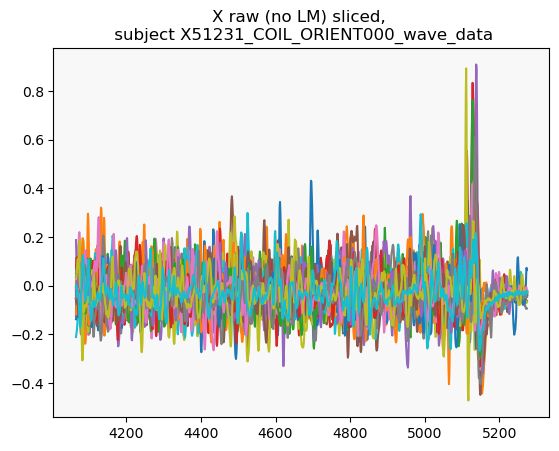

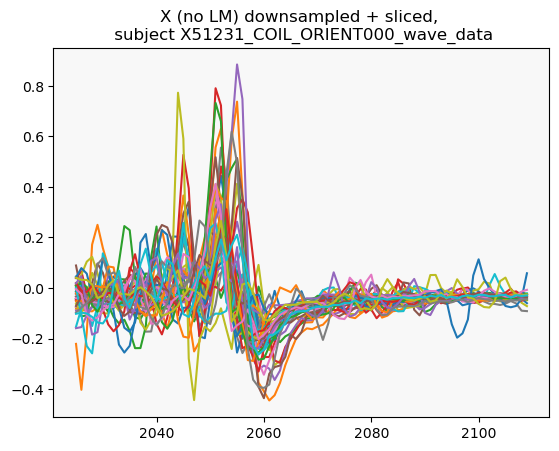

In [146]:
path = "/mnt/projects/USS_MEP/COIL_ORIENTATION/X06188_coil_orient.mat"
path = "/mnt/projects/USS_MEP/COIL_ORIENTATION/X51231_CoilOrientation.mat" #bliver meget spids
#path = "/mnt/projects/USS_MEP/COIL_ORIENTATION/X05398_coil_orient.mat" #bliver hakket ved downsampling
#path = "/mnt/projects/USS_MEP/COIL_ORIENTATION/sub-X36523_ses-1_task-coilorientation_emg.mat"
#path = "/mnt/projects/USS_MEP/COIL_ORIENTATION/sub-X86768_ses-1_task-coilorientation_run001_emg.mat"
data1 = read_mat(path)
if "sub" in path:
    key = list(data1.keys())[3]
else:
    key = list(data1.keys())[0]

X_raw = data1[key]['values'][:,0]
y = data1[key]['frameinfo']['state']
X_raw, y = data.delete_frames(X_raw,y) #X_raw her er det originale data for den path. slice det for at se signal

plt.title("X raw (no LM), \n subject "+str(key))
plt.plot(X_raw)
plt.show()
plt.title("X raw (no LM) sliced, \n subject "+str(key))
if "sub" not in path:
    plt.plot(np.arange(4065, 5275),X_raw[4065:5275])
else:
    plt.plot(np.arange(2065, 2275),X_raw[4065:2275])
plt.show()


# Downsample
if len(X_raw)==20000:
    downsampled_X_raw = []
    for i in range(len(X_raw[0])):
        downsampled_X_raw.append(data.downsample(np.transpose(X_raw)[i], 8000).tolist())
    downsampled_X_raw = np.transpose(downsampled_X_raw)
plt.title("X (no LM) downsampled + sliced, \n subject "+str(key))
if "sub" not in path:
    X_sliced = downsampled_X_raw[2025:2110]
    plt.plot(np.arange(2025, 2110),X_sliced)
else:
    X_sliced = downsampled_X_raw[4025:4110]
    plt.plot(np.arange(4025, 4110),X_sliced)


plt.show()



In [41]:
X_amplitude, X_latency,X_ampl_late, X_diff,X_fft = data.other_X(X)

X_mean = X.mean(-1)
X_diff = np.diff(X)

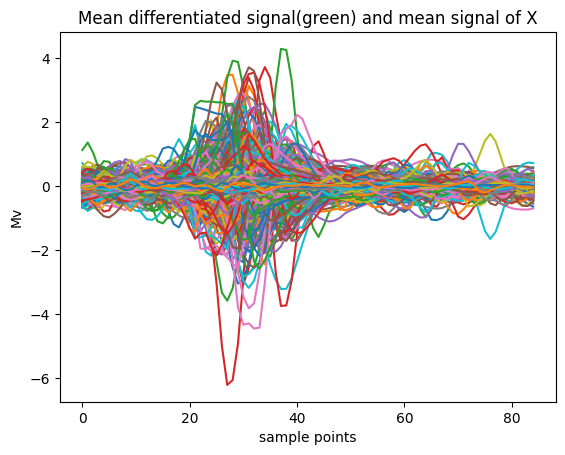

In [86]:
plt.plot(X_diff)
#plt.plot(X.mean(-1), color="blue")

# Add a title and labels to the plot
plt.title("Mean differentiated signal(green) and mean signal of X")
plt.xlabel("sample points")
plt.ylabel("Mv")

# Display the plot
plt.show()


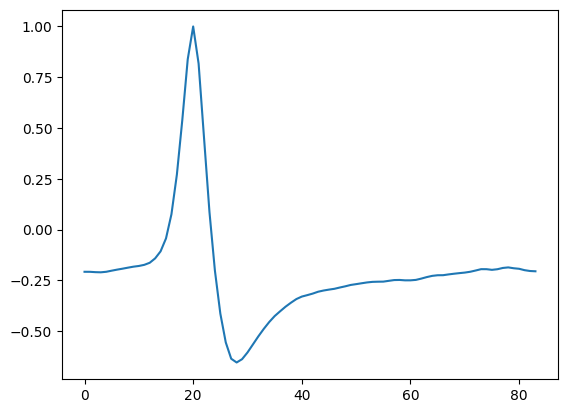

In [91]:
plt.plot(X_norm.mean(-1))

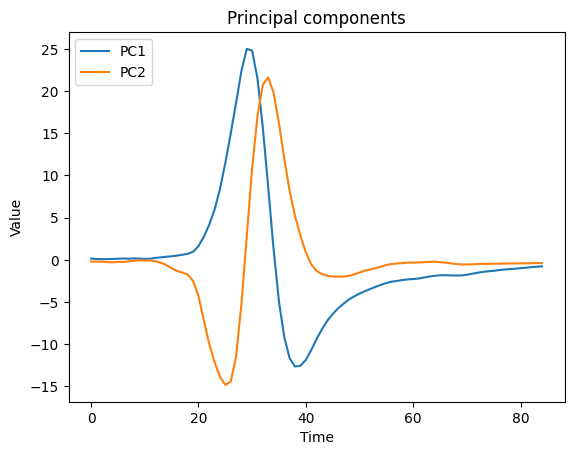

In [89]:
plot_functions.PCA(X, explained = False, n=2, PCAs = True)

In [42]:
X_norm = data.normalize_X(X, groups)
X_amplitude, X_latency,X_ampl_late, X_diff,X_fft = data.other_X(X_norm)


##### Visualizing X and X_norm

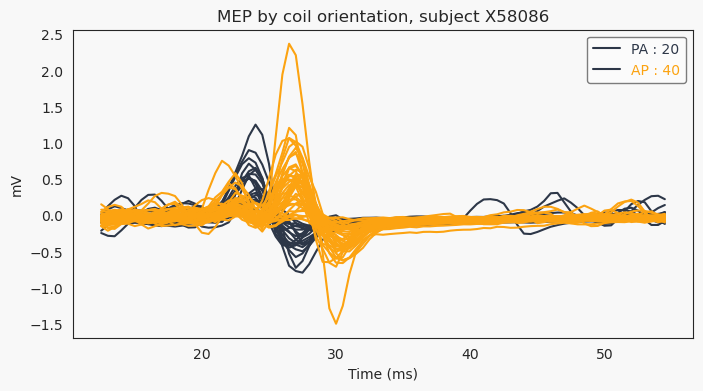

In [13]:
plot_functions.plot_subject_coil(X,y,list_subjects,groups,False,7)

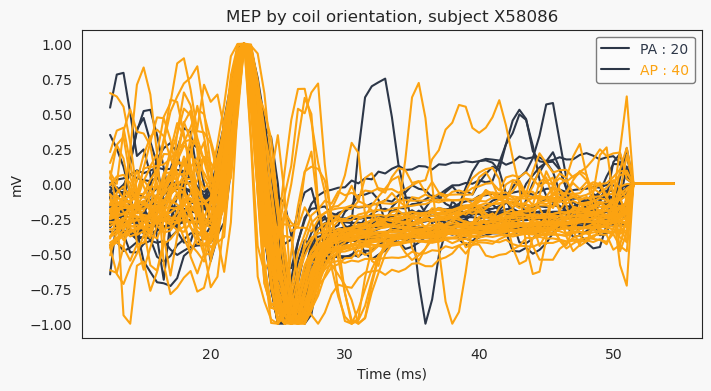

In [10]:
plot_functions.plot_subject_coil(X_norm,y,list_subjects,groups,False,7)

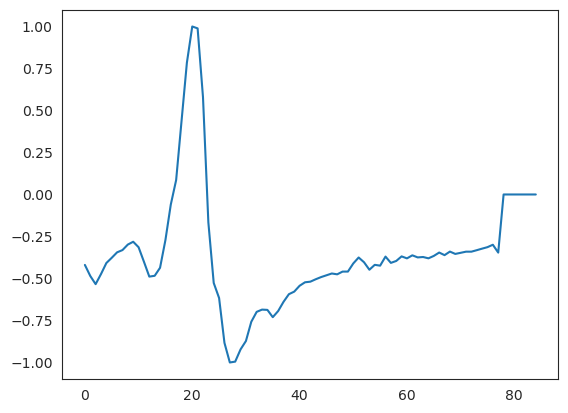

In [6]:
plt.plot(X_norm[:,2])

##### Plot specific subject

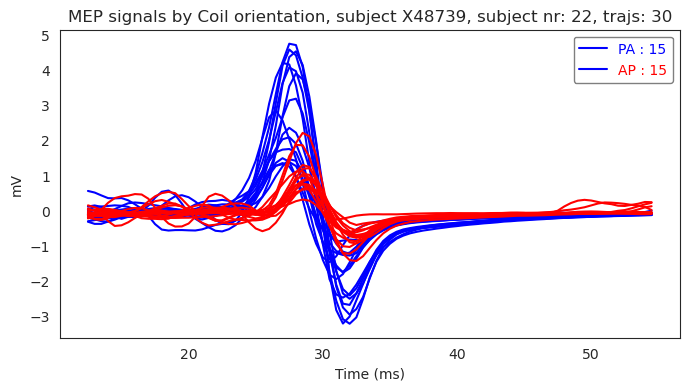

In [7]:
# Plot Specific groups
#plot_groups(X, groups, list_subjects=list_subjects, specifics = [5,18,19,31,32])

# Plot all subjects by coil orientations, PA and AP
#plot_coil(X,y, list_subjects, groups, mean = False, subject = None)

subject = 22 # set specific subject
plot_functions.plot_subject_coil(X,y,list_subjects,groups,mean=False,subject=subject)

#### Logistic Regression models

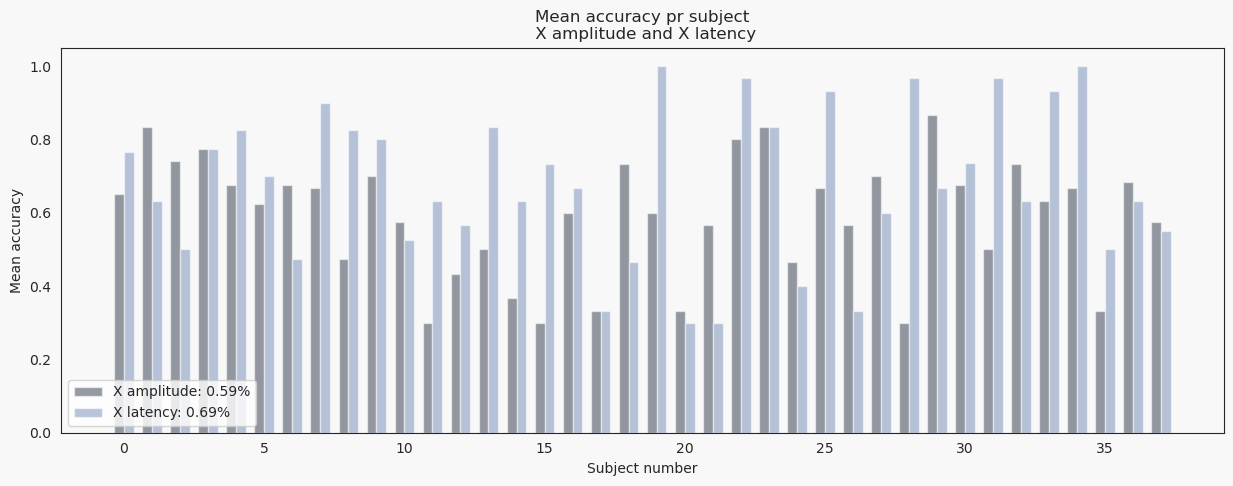

In [5]:
# 10-fold stratified cross validation PR SUBJECT
tot_scores_x, tot_indi_scores, mean_indi_scores_X, all_subject_coefficients = models.kfold_logisticregression_prsubject_stratified(X_amplitude, y, groups, onerow = True)
# 10-fold stratified cross validation PR SUBJECT on X normalized
tot_scores_xnorm, tot_indi_scores, mean_indi_scores_X_norm, all_subject_coefficients = models.kfold_logisticregression_prsubject_stratified(X_latency, y, groups, onerow = True)


plot_functions.barplotmix(groups, mean_indi_scores_X, mean_indi_scores_X_norm, acc_x = np.mean(tot_scores_x), acc_xnorm = np.mean(tot_scores_xnorm), xtype_title = 'X amplitude and X latency')

#mean_accuracy_pr_subject_X_Xnorm

0.9215988835725678
number of subjects: 38


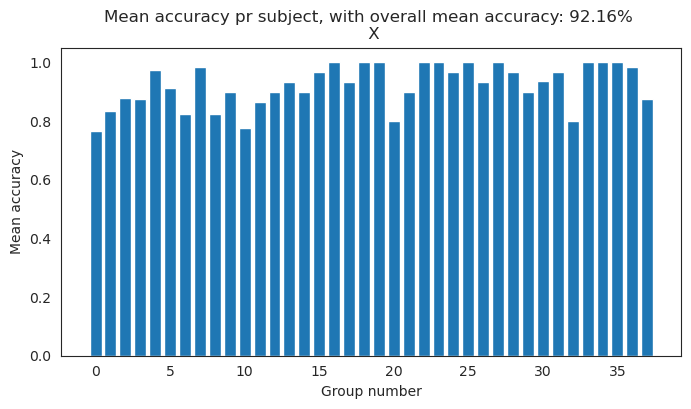

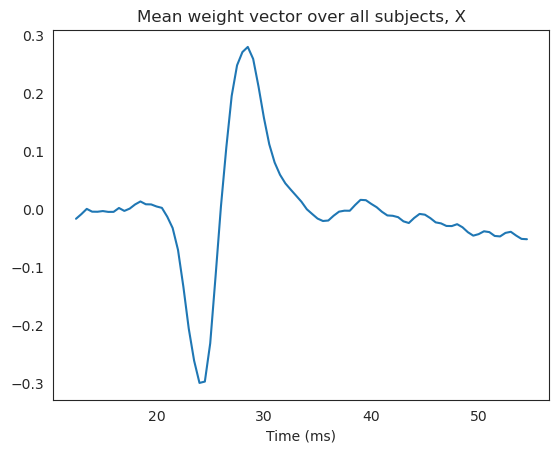

In [5]:
# 10-fold stratified cross validation PR SUBJECT
tot_scores, tot_indi_scores, mean_indi_scores, all_subject_coefficients = models.kfold_logisticregression_prsubject_stratified(X, y, groups, onerow = False)

print(np.mean(tot_scores))
print(f"number of subjects: {len(tot_indi_scores)}")

STAA = 12.5  # sliced_time_after_artifact
n_data_points = X.shape[0]
time = np.arange(n_data_points) / 2000 * 1000 + STAA

tot_scores_mean = np.mean(tot_scores)
plot_functions.barplot(groups, mean_indi_scores, acc = tot_scores_mean, xtype_title = 'X')

plt.title('Mean weight vector over all subjects, X')
plt.xlabel('Time (ms)')
plt.plot(time,np.mean(all_subject_coefficients, axis=0))

# Plot weight vectors for every single subject use: all_subject_coefficients

0.6469816586921849
number of subjects: 38


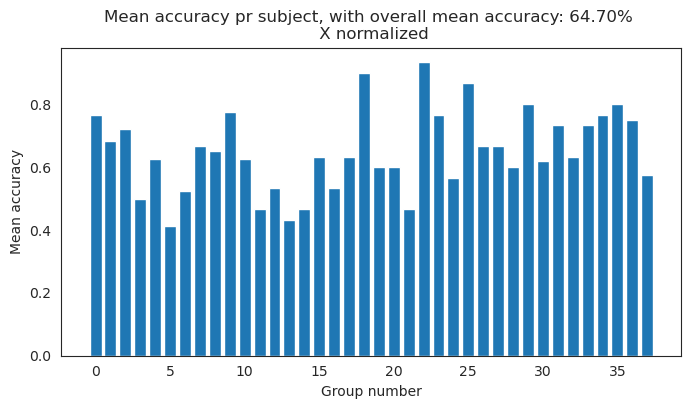

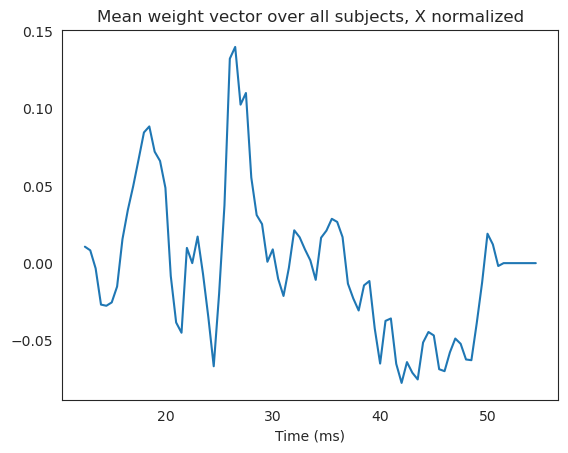

In [8]:
X_norm = data.normalize_X(X, groups)
# 10-fold stratified cross validation PR SUBJECT on X normalized
tot_scores, tot_indi_scores, mean_indi_scores, all_subject_coefficients = models.kfold_logisticregression_prsubject_stratified(X_norm, y, groups, onerow = False)

print(np.mean(tot_scores))
print(f"number of subjects: {len(tot_indi_scores)}")

STAA = 12.5  # sliced_time_after_artifact
n_data_points = X.shape[0]
time = np.arange(n_data_points) / 2000 * 1000 + STAA

tot_scores_mean = np.mean(tot_scores)
plot_functions.barplot(groups, mean_indi_scores, acc = tot_scores_mean, xtype_title = 'X_norm')

plt.title('Mean weight vector over all subjects, X normalized')
plt.xlabel('Time (ms)')
plt.plot(time,np.mean(all_subject_coefficients, axis=0))

# Plot weight vectors for every single subject use: all_subject_coefficients

0.9242384370015949
number of subjects: 38


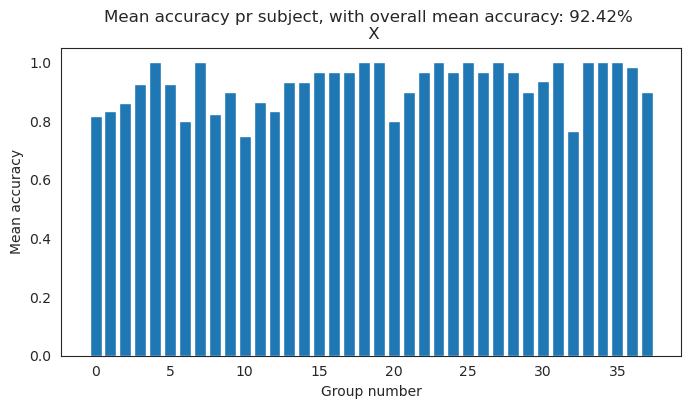

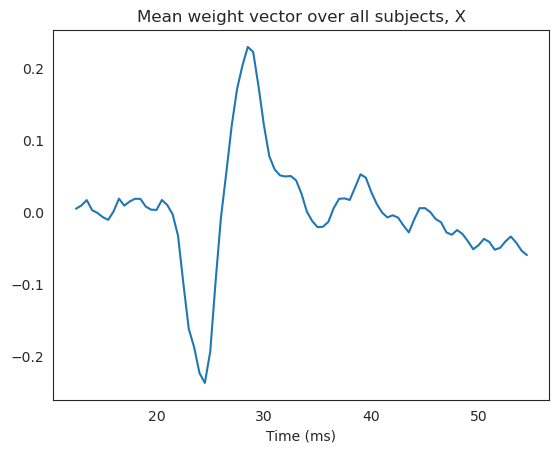

In [7]:
# 10-fold stratified cross validation PR SUBJECT SVM!
tot_scores, tot_indi_scores, mean_indi_scores, all_subject_coefficients = models.kfold_svm_prsubject_stratified(X, y, groups, onerow = False)

print(np.mean(tot_scores))
print(f"number of subjects: {len(tot_indi_scores)}")

STAA = 12.5  # sliced_time_after_artifact
n_data_points = X.shape[0]
time = np.arange(n_data_points) / 2000 * 1000 + STAA

tot_scores_mean = np.mean(tot_scores)
plot_functions.barplot(groups, mean_indi_scores, acc = tot_scores_mean, xtype_title = 'X')

plt.title('Mean weight vector over all subjects, X')
plt.xlabel('Time (ms)')
plt.plot(time,np.mean(all_subject_coefficients, axis=0))

# Plot weight vectors for every single subject use: all_subject_coefficients

0.6487240829346094
number of subjects: 38


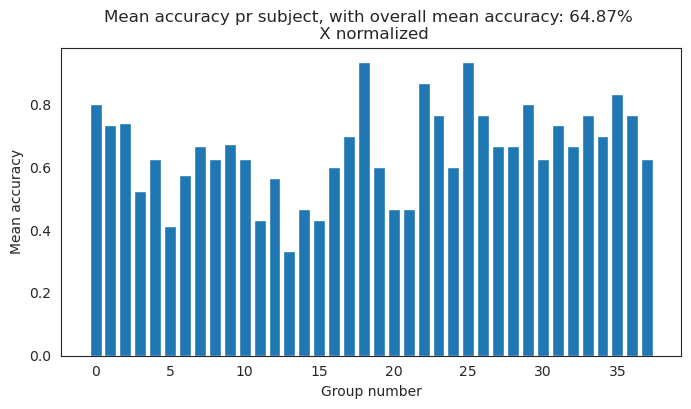

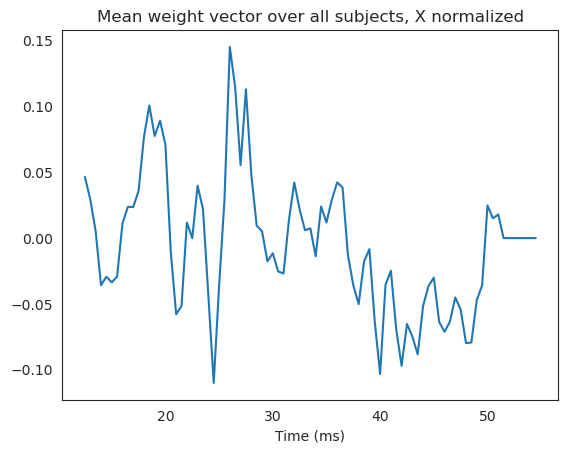

In [9]:
X_norm = data.normalize_X(X, groups)
# 10-fold stratified cross validation PR SUBJECT SVM! NORMALIZED
tot_scores, tot_indi_scores, mean_indi_scores, all_subject_coefficients = models.kfold_svm_prsubject_stratified(X_norm, y, groups, onerow = False)

print(np.mean(tot_scores))
print(f"number of subjects: {len(tot_indi_scores)}")

STAA = 12.5  # sliced_time_after_artifact
n_data_points = X.shape[0]
time = np.arange(n_data_points) / 2000 * 1000 + STAA

tot_scores_mean = np.mean(tot_scores)
plot_functions.barplot(groups, mean_indi_scores, acc = tot_scores_mean, xtype_title = 'X_norm')

plt.title('Mean weight vector over all subjects, X normalized')
plt.xlabel('Time (ms)')
plt.plot(time,np.mean(all_subject_coefficients, axis=0))

# Plot weight vectors for every single subject use: all_subject_coefficients

Scores for amplitude feature: 0.5081310558385775
Scores for latency feature: 0.5088402756967335
Scores for amplitude and latency feature: 0.5081310558385775
Scores for all features X: 0.6799120966936371


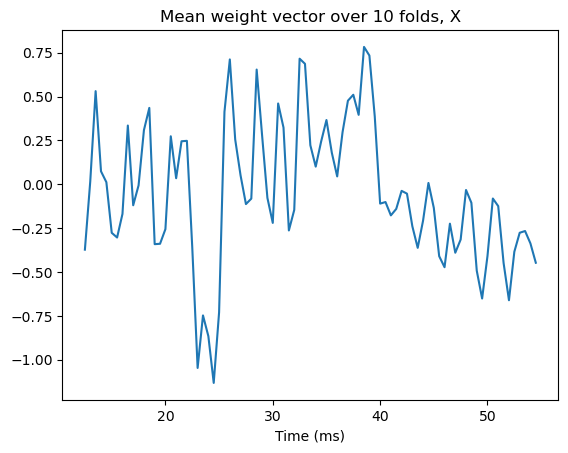

In [14]:
# General log reg model 10fold cv
scores, mean_score, coefficients = models.k10fold_logreg_generel_model(X_amplitude, y, onerow = True)
print(f"Scores for amplitude feature: {mean_score}")
scores, mean_score, coefficients = models.k10fold_logreg_generel_model(X_latency, y, onerow = True)
print(f"Scores for latency feature: {mean_score}")
scores, mean_score, coefficients = models.k10fold_logreg_generel_model(X_ampl_late, y, onerow = True)
print(f"Scores for amplitude and latency feature: {mean_score}")
scores, mean_score, coefficients = models.k10fold_logreg_generel_model(X, y, onerow = False)
print(f"Scores for all features X: {mean_score}")


STAA = 12.5  # sliced_time_after_artifact
n_data_points = X.shape[0]
time = np.arange(n_data_points) / 2000 * 1000 + STAA
plt.title('Mean weight vector over 10 folds, X')
plt.xlabel('Time (ms)')
plt.plot(time, np.mean(coefficients,axis=0))


Scores for all features X normalized: 0.5505194286285087


/mrhome/johannecaf/anaconda3/envs/USS_MEP/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/mrhome/johannecaf/anaconda3/envs/USS_MEP/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

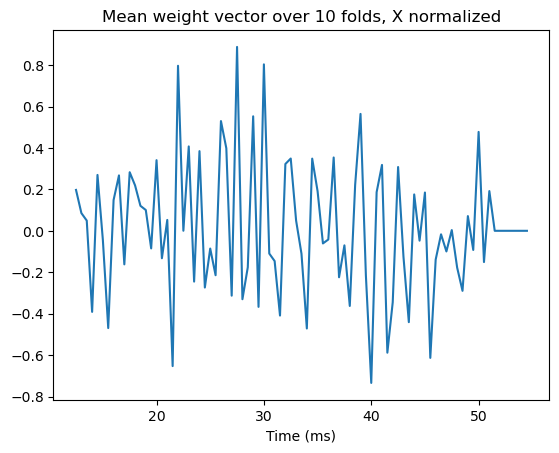

In [15]:
scores, mean_score, coefficients = models.k10fold_logreg_generel_model(X_norm, y, onerow = False)
print(f"Scores for all features X normalized: {mean_score}")
plt.title('Mean weight vector over 10 folds, X normalized')
plt.xlabel('Time (ms)')
plt.plot(time, np.mean(coefficients,axis=0))

Scores for amplitude feature: 0.5081310558385775
Scores for latency feature: 0.5088402756967335
Scores for amplitude and latency feature: 0.5081310558385775
Scores for all features X: 0.6799120966936371


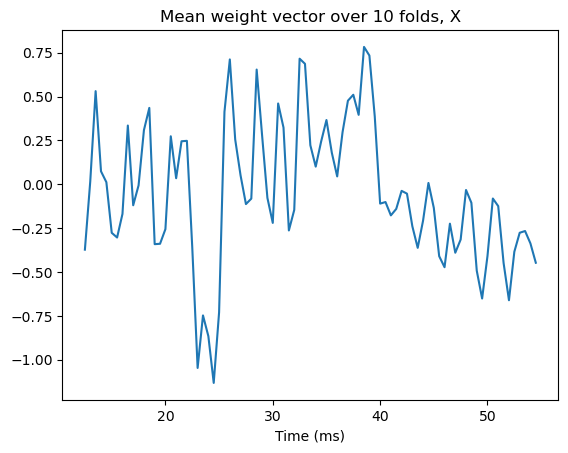

In [17]:
# General svm model 10fold cv X
scores, mean_score, coefficients = models.k10fold_svm_generel_model(X_amplitude, y, onerow = True)
print(f"Scores for amplitude feature: {mean_score}")
scores, mean_score, coefficients = models.k10fold_svm_generel_model(X_latency, y, onerow = True)
print(f"Scores for latency feature: {mean_score}")
scores, mean_score, coefficients = models.k10fold_svm_generel_model(X_ampl_late, y, onerow = True)
print(f"Scores for amplitude and latency feature: {mean_score}")
scores, mean_score, coefficients = models.k10fold_svm_generel_model(X, y, onerow = False)
print(f"Scores for all features X: {mean_score}")


STAA = 12.5  # sliced_time_after_artifact
n_data_points = X.shape[0]
time = np.arange(n_data_points) / 2000 * 1000 + STAA
plt.title('Mean weight vector over 10 folds, X')
plt.xlabel('Time (ms)')
plt.plot(time, np.mean(coefficients,axis=0))

Scores for all features X normalized: 0.5505194286285087


/mrhome/johannecaf/anaconda3/envs/USS_MEP/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/mrhome/johannecaf/anaconda3/envs/USS_MEP/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

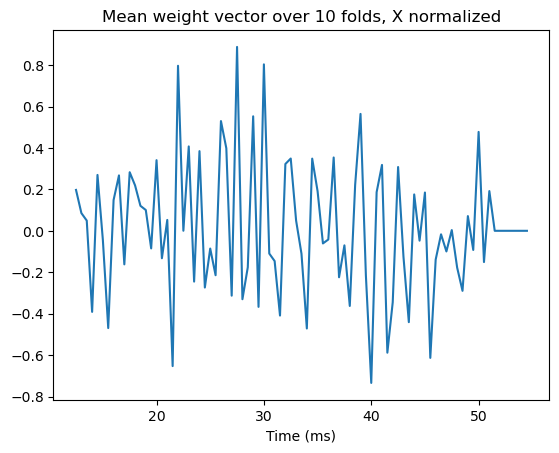

In [16]:
# SVM generel X normalized
scores, mean_score, coefficients = models.k10fold_svm_generel_model(X_norm, y, onerow = False)
print(f"Scores for all features X normalized: {mean_score}")
plt.title('Mean weight vector over 10 folds, X normalized')
plt.xlabel('Time (ms)')
plt.plot(time, np.mean(coefficients,axis=0))

## PCA (component analysis)

In [45]:
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [56]:
colorpalette = ["#FCA311", "#F9A128", "#F79B41", "#F69756", "#F3926B", "#EF8D80", "#EC8994", "#E984A9", "#E67FBF", "#E379D3"]
colorpalette = ["#1C2A3A", "#354656", "#738CB8", "#8AA2B8", "#A8C0CD"]
colorpalette =  ["#334E6C", "#4A6885", "#6D8FB8", "#87A7C2", "#A0C0CC"]
custom_palette_ct_12 = sns.color_palette(colorpalette)
Xt = np.transpose(X)
pca = PCA(n_components=5)
pca.fit(Xt)
components = pca.components_


In [27]:
cumulative_weights = np.sum(np.abs(components[:5, :]), axis=0)
top_40_indices = np.argsort(cumulative_weights)[-40:]
print(top_40_indices)

[55 54 16 53 52 51 48 47 46 49 50 17 45 18 44 43 19 42 41 20 36 24 40 25
 23 21 35 31 32 37 33 22 26 34 30 39 28 38 29 27]


In [61]:
fig, axes = plt.subplots(5, 1, figsize=(15, 15), sharex=True)
plt.style.use({"axes.facecolor": "#F8F8F8"})
fig.set_facecolor("#F8F8F8")

# Create bar plots for each of the first 5 PCs using all features
for i in range(5):
    barplot = sns.barplot(
        x=list(range(85)),  # this assumes you have 85 features
        y=components[i, :],
        palette=custom_palette_ct_12,
        ax=axes[i]
    )

    # Only include the title for the first subplot
    if i == 0:
        axes[i].set_title("Feature importance by PCA", fontsize=20)

    axes[i].set_ylabel(f"PC{i + 1}", fontsize=16)

# Set the x-axis label and rotate the tick labels for better readability
plt.xlabel("Features", fontsize=16)
plt.xticks(rotation=90)
plt.tight_layout()

plt.savefig('PCA_features_5.png', dpi=100, bbox_inches='tight')
plt.close(fig)


In [138]:
df

,random_numbers
0,26
1,34
2,17
3,6
4,24
5,33
6,23
7,9
8,13
9,33


In [10]:
scaler = StandardScaler()
scaler.fit()
pca = PCA()
pca.fit(X,y)
X.shape

TypeError: StandardScaler.fit() missing 1 required positional argument: 'X'

In [136]:
custom_palette_ct_12 = sns.color_palette("deep")

# Get the top 10 important features' indices based on cumulative absolute weights across the first 5 PCs
components = pca.components_
#print(pca.components_.shape)
cumulative_weights = np.sum(np.abs(components[:5, :]), axis=0)
#print(cumulative_weights)
print(len(cumulative_weights))
top_10_indices = np.argsort(cumulative_weights)[-40:]
print(top_10_indices)
print(len(top_10_indices))

# Sort the top features by their column names (our case will be feature time stamp )
sorted_top_10_indices = top_10_indices[np.argsort(X[:,:10])] #X.columns[top_10_indices]
print(f"sorted {sorted_top_10_indices}")

# Create a single figure with 5 subplots arranged vertically and sharing the x-axis
#fig, axes = plt.subplots(5, 1, figsize=(15, 15), sharex=True)
#plt.style.use({"axes.facecolor": "#F8F8F8"})
#fig.set_facecolor("#F8F8F8")
#axes[0].set_facecolor("#F8F8F8")
# Create bar plots for each of the first 5 PCs using the top 10 features in the same order
#for i in range(5):
#    barplot = sns.barplot(
#        x = sorted_top_10_indices #df_train.columns[sorted_top_10_indices],
#        y=components[i, sorted_top_10_indices],
#        palette=custom_palette_ct_12, 
#        ax=axes[i])
#
#    # Only include the title for the first subplot
#    if i == 0:
#        axes[i].set_title("Feature importance by PCA")
#
#    axes[i].set_ylabel(f"PC{i + 1}")
    


# Set the x-axis label and rotate the tick labels for better readability
#plt.xlabel("Variables")
#plt.xticks(rotation=90)
#plt.tight_layout()
#plt.show()
#plt.savefig(f'BaselineModel_Plots/FS.png', dpi=100, bbox_inches='tight')
#plt.close(fig)


1415
[ 667 1250 1023 1244 1025 1249 1009 1331   47 1017 1319 1015 1111 1243
 1016 1242  658  662   48  207   41 1251 1119 1061  655  656  190 1021
 1027  701  704  758 1241 1108 1113  664 1328  665 1315  700]
40
sorted [[1009 1244 1249 1025 1250 1023  667 1331 1017   47]
 [1009 1244 1250 1025 1249 1023  667 1017 1331   47]
 [1009 1244 1250 1023 1249 1025 1017  667   47 1331]
 [1009 1023 1250 1244 1249  667 1331 1017   47 1025]
 [1009 1023 1331 1250   47 1249 1244  667 1017 1025]
 [  47 1009 1331 1249 1250 1023  667 1244 1017 1025]
 [  47 1009 1331 1249 1023 1250  667 1244 1025 1017]
 [  47 1331 1009 1249  667 1023 1250 1017 1025 1244]
 [1331 1017   47  667 1249 1025 1250 1023 1244 1009]
 [1017 1331  667 1249 1244 1025 1250   47 1023 1009]
 [1017 1331  667 1025 1250 1249 1244 1023   47 1009]
 [1017 1244 1025 1250 1331  667 1023 1249   47 1009]
 [1244 1025 1250 1017 1331 1023  667 1249   47 1009]
 [1025 1244 1023 1017 1250 1331   47 1249  667 1009]
 [  47 1025 1017 1023 1331 1250 1244  6

## Activation patterns

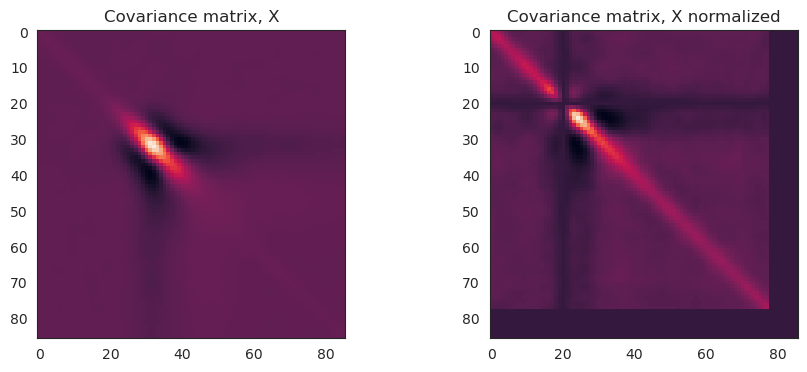

<Figure size 640x480 with 0 Axes>

In [20]:
#Sigma_x: Data covariance 
centered_X = np.transpose(X) - np.mean(X,axis=1)
covariance_matrix_X = np.cov(centered_X, rowvar=False)
centered_Xnorm = np.transpose(X_norm) - np.mean(X_norm,axis=1)
covariance_matrix_Xnorm = np.cov(centered_Xnorm, rowvar=False)

# Create a figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Plot data on the first subplot
ax1.imshow(covariance_matrix_X)
ax1.set_title('Covariance matrix, X')

# Plot data on the second subplot
ax2.imshow(covariance_matrix_Xnorm)
ax2.set_title('Covariance matrix, X normalized')
#plt.imshow(covariance_matrix_Xnorm, origin = "lower") #flipped covariance matrix


# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Show the figure
plt.show()

plt.savefig('Covariance.png', dpi=300)  # Specify the desired filename and DPI


Text(0.5, 1.0, 'Logistic regression Weight Coefficients, X normalized')

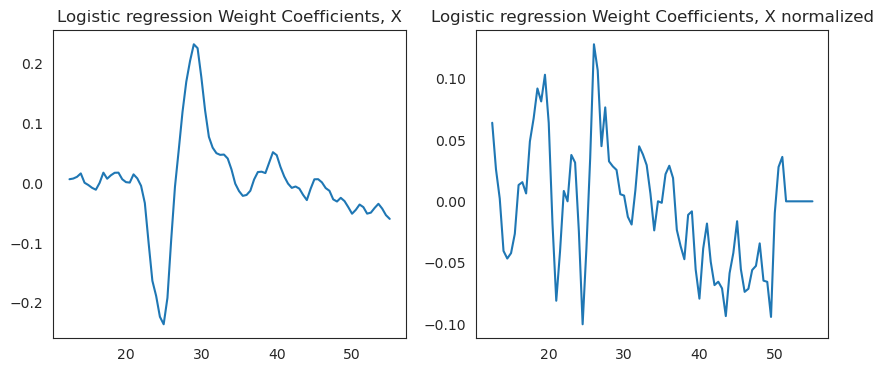

In [9]:
tot_scores, tot_indi_scores, mean_indi_scores, all_subject_coefficients = models.kfold_svm_prsubject_stratified(X, y, groups, onerow = False)
tot_scores, tot_indi_scores, mean_indi_scores, all_subject_coefficients_Xnorm = models.kfold_svm_prsubject_stratified(X_norm, y, groups, onerow = False)
W = np.mean(all_subject_coefficients, axis=0)
W_Xnorm = np.mean(all_subject_coefficients_Xnorm, axis=0)


# Create a figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Plot data on the first subplot
ax1.plot(np.arange(X.shape[0]) / 2000 * 1000 + 12.5, W)
ax1.set_title('Logistic regression Weight Coefficients, X')
# Plot data on the second subplot
ax2.plot(np.arange(X.shape[0]) / 2000 * 1000 + 12.5, W_Xnorm)
ax2.set_title('Logistic regression Weight Coefficients, X normalized')


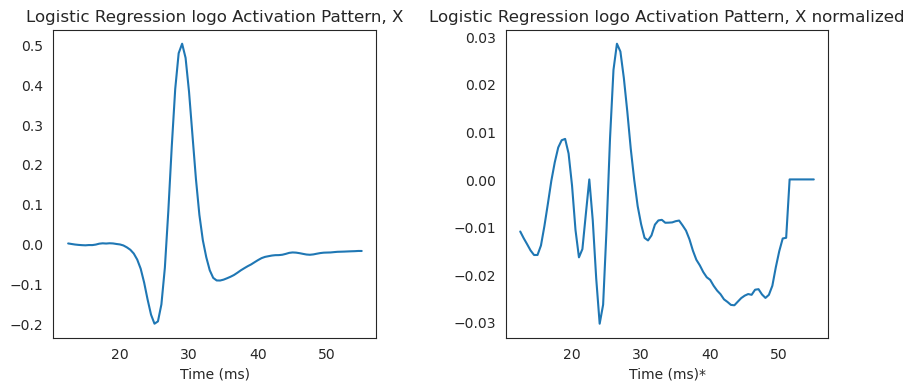

In [10]:
# compute the activation pattern: A = Sigma_x W Sigma_s, where Sigma_s is the covariance between the latent features
A = covariance_matrix_X @ W
A_Xnorm = covariance_matrix_Xnorm @ W_Xnorm

# Create a figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Plot data on the first subplot
ax1.plot(np.arange(X.shape[0]) / 2000 * 1000 + 12.5, A)
ax1.set_xlabel("Time (ms)")
ax1.set_title('Logistic Regression logo Activation Pattern, X')

# Plot data on the second subplot
ax2.plot(np.arange(X.shape[0]) / 2000 * 1000 + 12.5, A_Xnorm)
ax2.set_xlabel("Time (ms)*")
ax2.set_title('Logistic Regression logo Activation Pattern, X normalized')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4)

##  Logistic regression, weight coefficients and activation patterns

#### X & X normalized activation patterns

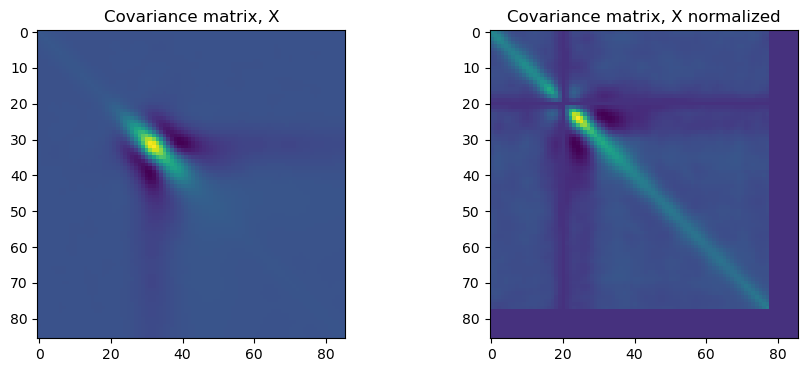

In [5]:
#Sigma_x: Data covariance 
centered_X = np.transpose(X) - np.mean(X,axis=1)
covariance_matrix_X = np.cov(centered_X, rowvar=False)
centered_Xnorm = np.transpose(X_norm) - np.mean(X_norm,axis=1)
covariance_matrix_Xnorm = np.cov(centered_Xnorm, rowvar=False)

# Create a figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Plot data on the first subplot
ax1.imshow(covariance_matrix_X)
ax1.set_title('Covariance matrix, X')

# Plot data on the second subplot
ax2.imshow(covariance_matrix_Xnorm)
ax2.set_title('Covariance matrix, X normalized')
#plt.imshow(covariance_matrix_Xnorm, origin = "lower") #flipped covariance matrix


# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Show the figure
plt.show()


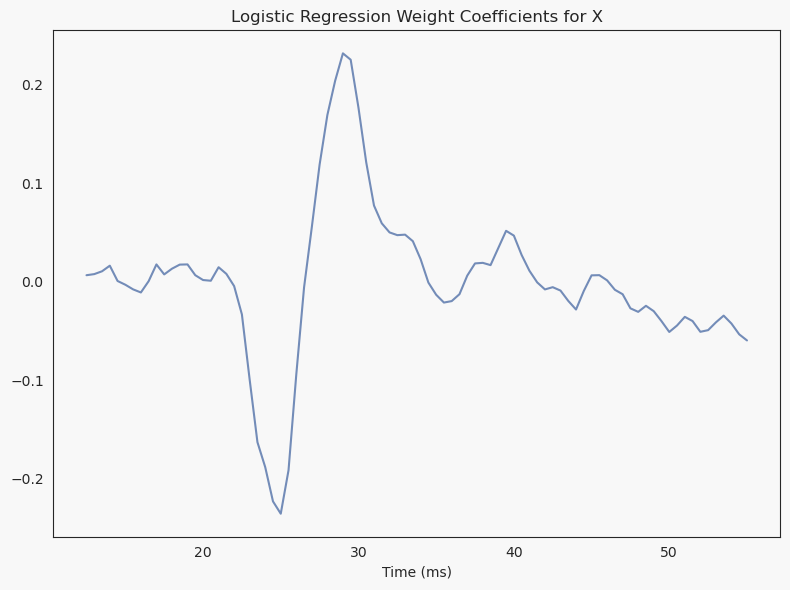

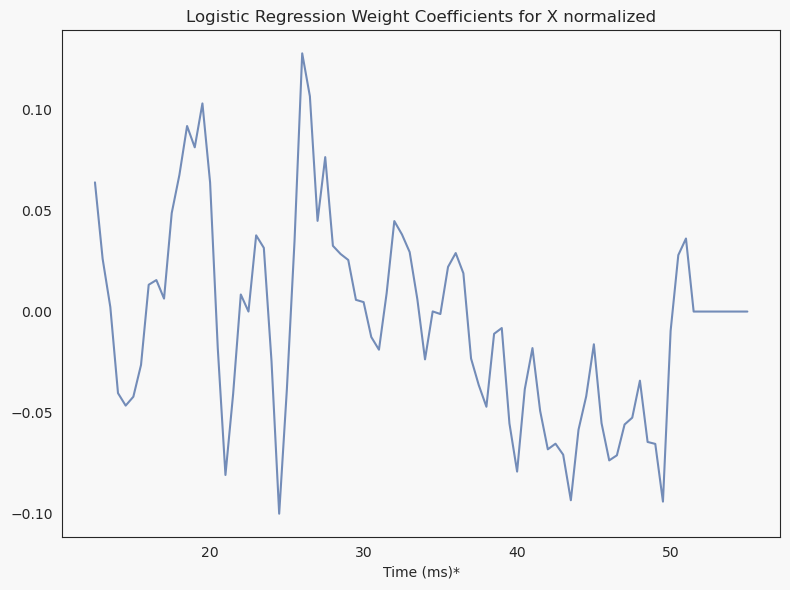

In [15]:
tot_scores, tot_indi_scores, mean_indi_scores, all_subject_coefficients = models.kfold_svm_prsubject_stratified(X, y, groups, onerow = False)
tot_scores, tot_indi_scores, mean_indi_scores, all_subject_coefficients_Xnorm = models.kfold_svm_prsubject_stratified(X_norm, y, groups, onerow = False)
W = np.mean(all_subject_coefficients, axis=0)
W_Xnorm = np.mean(all_subject_coefficients_Xnorm, axis=0)


# Define the color palette and background color
colorpalette = ['#2D3748', '#738CB8', '#FCA311', '#BFEDC1']
background_color = '#F8F8F8'

# Create the first figure
fig1, ax1 = plt.subplots(figsize=(8, 6), facecolor=background_color)

# Set the background color for the first figure
ax1.set_facecolor(background_color)

# Plot data on the first figure
ax1.plot(np.arange(X.shape[0]) / 2000 * 1000 + 12.5, W, color=colorpalette[1])
ax1.set_title('Logistic Regression Weight Coefficients for X')
ax1.set_xlabel('Time (ms)')
#ax1.set_ylabel('Weight Coefficients')

# Adjust the layout
plt.tight_layout()

# Save the first figure as an image
fig1.savefig('LogisticWeightCoefficientsX.png', dpi=300)  # Specify the desired filename and DPI

# Create the second figure
fig2, ax2 = plt.subplots(figsize=(8,6), facecolor=background_color)

# Set the background color for the second figure
ax2.set_facecolor(background_color)

# Plot data on the second figure
ax2.plot(np.arange(X.shape[0]) / 2000 * 1000 + 12.5, W_Xnorm, color=colorpalette[1])
ax2.set_title('Logistic Regression Weight Coefficients for X normalized')
ax2.set_xlabel('Time (ms)*')
#ax2.set_ylabel('Weight Coefficients')

# Adjust the layout
plt.tight_layout()

# Save the second figure as an image
fig2.savefig('LogisticWeightCoefficientsXnormalized.png', dpi=300)  # Specify the desired filename and DPI

# Close the figures to free up memory
#plt.close(fig1)
#plt.close(fig2)

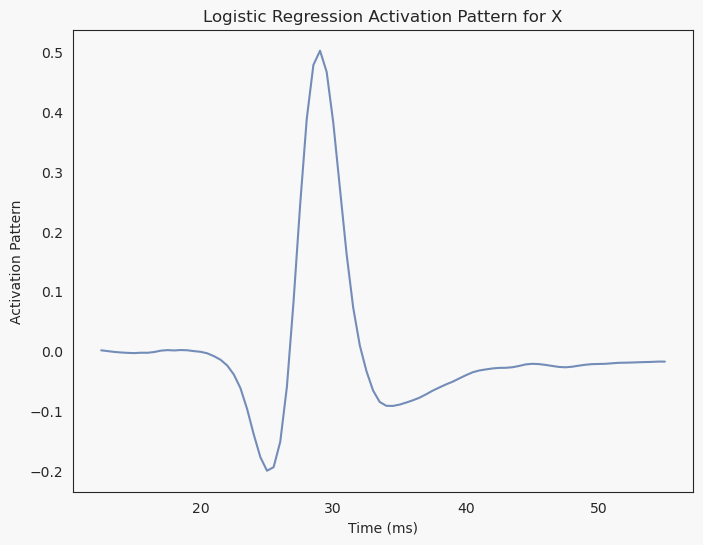

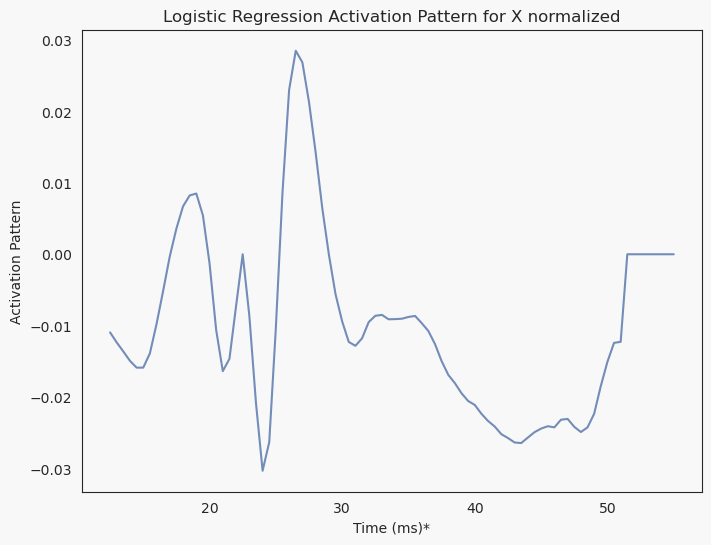

In [14]:
# compute the activation pattern: A = Sigma_x W Sigma_s, where Sigma_s is the covariance between the latent features
A = covariance_matrix_X @ W
A_Xnorm = covariance_matrix_Xnorm @ W_Xnorm

# Define the color palette and background color
colorpalette = ['#2D3748', '#738CB8', '#FCA311', '#BFEDC1']
background_color = '#F8F8F8'

# Compute the activation pattern
A = covariance_matrix_X @ W
A_Xnorm = covariance_matrix_Xnorm @ W_Xnorm

# Create the first figure
fig1, ax1 = plt.subplots(figsize=(8, 6), facecolor=background_color)

# Set the background color for the first figure
ax1.set_facecolor(background_color)

# Plot data on the first figure
ax1.plot(np.arange(X.shape[0]) / 2000 * 1000 + 12.5, A, color=colorpalette[1])
ax1.set_xlabel("Time (ms)")
#ax1.set_ylabel("Activation Pattern")
ax1.set_title('Logistic Regression Activation Pattern for X')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Save the first figure as an image
fig1.savefig('LogisticActivationPattern_X.png', dpi=300)  # Specify the desired filename and DPI

# Create the second figure
fig2, ax2 = plt.subplots(figsize=(8, 6), facecolor=background_color)

# Set the background color for the second figure
ax2.set_facecolor(background_color)

# Plot data on the second figure
ax2.plot(np.arange(X.shape[0]) / 2000 * 1000 + 12.5, A_Xnorm, color=colorpalette[1])
ax2.set_xlabel("Time (ms)*")
#ax2.set_ylabel("Activation Pattern")
ax2.set_title('Logistic Regression Activation Pattern for X normalized')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Save the second figure as an image
fig2.savefig('LogisticActivationPattern_Xnormalized.png', dpi=300)  # Specify the desired filename and DPI



#### NPAIRS activation patterns

In [76]:
# Create two almost equal size subsets of the data
np.random.seed(10) # set seed

selected_groups = np.random.choice(np.unique(groups), size=np.unique(groups).shape[0]//2, replace=False)
X1 = np.transpose(X)[np.isin(groups, selected_groups)]
X2 = np.transpose(X)[~np.isin(groups, selected_groups)]
groupsX1 = selected_groups

print(X1.shape)
print(X2.shape)

(720, 86)
(695, 86)


In [77]:
import numpy as np
np.random.seed(10)  # set seed

# Get the unique groups and select half of them randomly
selected_groups = np.random.choice(np.unique(groups), size=np.unique(groups).shape[0]//2, replace=False)

# Create masks for selected and non-selected groups
mask_X1 = np.isin(groups, selected_groups)
mask_X2 = ~mask_X1

# Apply masks to X
X1 = X[:, mask_X1]
X2 = X[:, mask_X2]

# Apply masks to y
y_X1 = np.array(y)[mask_X1]
y_X2 = np.array(y)[mask_X2]

# Apply masks to groups
groups_X1 = np.array(groups)[mask_X1]
groups_X2 = np.array(groups)[mask_X2]

print(X1.shape)
print(X2.shape)

(86, 720)
(86, 695)


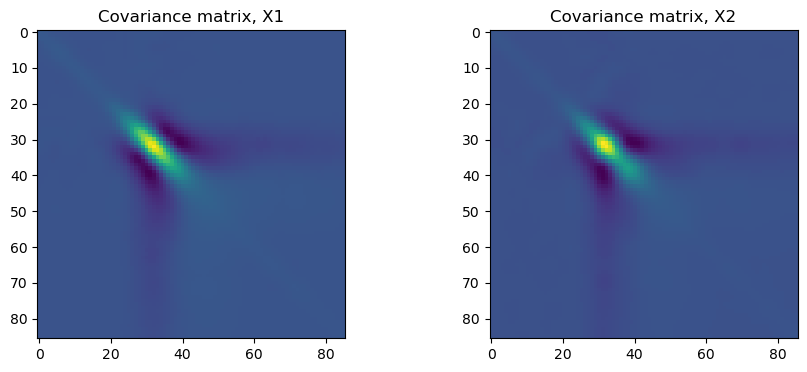

In [80]:
# compute covariance matrices
centered_X1 = np.transpose(X1) - np.mean(X1, axis=1)
covariance_matrix_X1 = np.cov(centered_X1, rowvar=False)
centered_X2 = np.transpose(X2) - np.mean(X2, axis=1)
covariance_matrix_X2 = np.cov(centered_X2, rowvar=False)

# Create a figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Plot data on the first subplot
ax1.imshow(covariance_matrix_X1)
ax1.set_title('Covariance matrix, X1')

# Plot data on the second subplot
ax2.imshow(covariance_matrix_X2)
ax2.set_title('Covariance matrix, X2')
plt.subplots_adjust(wspace=0.4)
plt.show()

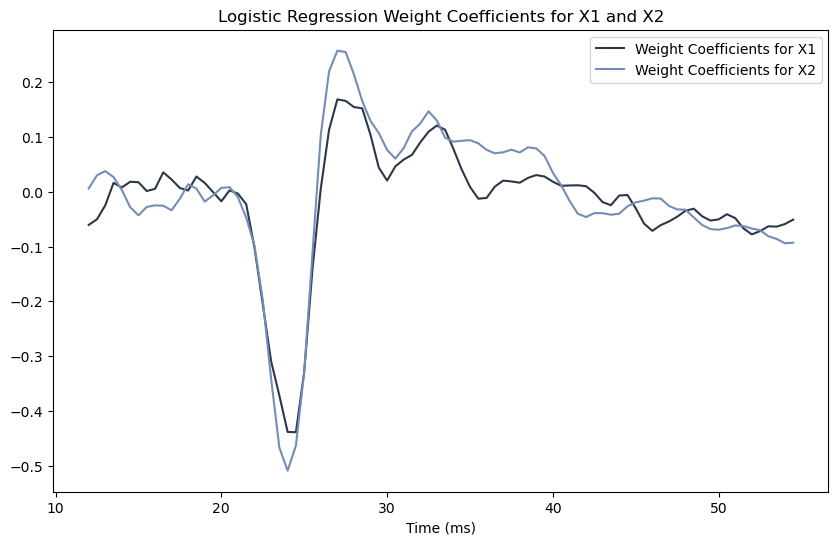

In [105]:
# compute weight coefficients
tot_scores, tot_indi_scores, mean_indi_scores, all_subject_coefficients_X1 = models.kfold_logisticregression_prsubject_stratified(X1, y_X1, groups_X1, onerow = False)
tot_scores, tot_indi_scores, mean_indi_scores, all_subject_coefficients_X2 = models.kfold_logisticregression_prsubject_stratified(X2, y_X2, groups_X2, onerow = False)
W1 = np.mean(all_subject_coefficients_X1, axis=0)
W2 = np.mean(all_subject_coefficients_X2, axis=0)


# Define the color palette and background color
colorpalette = ['#2D3748', '#738CB8', '#FCA311', '#BFEDC1']
background_color = '#F8F8F8'

# Define the color palette
colorpalette = ['#2D3748', '#738CB8', '#FCA311', '#BFEDC1']

# Create a figure
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(np.arange(X1.shape[0]) / 2000 * 1000 + 12, W1, color=colorpalette[0], label='Weight Coefficients for X1')
ax.plot(np.arange(X1.shape[0]) / 2000 * 1000 + 12, W2, color=colorpalette[1], label='Weight Coefficients for X2')
ax.set_title('Logistic Regression Weight Coefficients for X1 and X2')
ax.set_xlabel('Time (ms)')
ax.legend()

# Show the plot
plt.show()

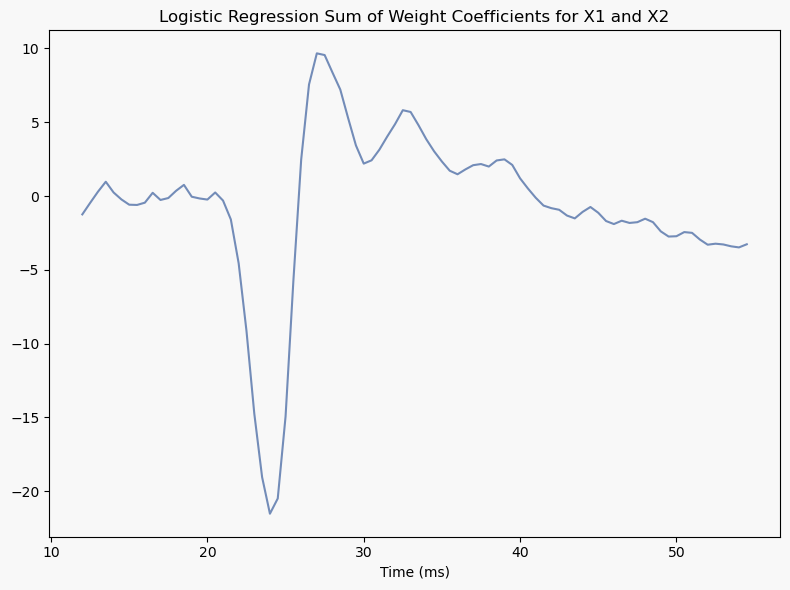

In [103]:
# NPAIR split weight coefficient
# sum of weight coefficients / std(W1 - W2)
sumW1W2 = (W1 + W2)/ np.std(W1 - W2)


# Define the color palette and background color
colorpalette = ['#2D3748', '#738CB8', '#FCA311', '#BFEDC1']
background_color = '#F8F8F8'

# Create the first figure
fig1, ax1 = plt.subplots(figsize=(8, 6), facecolor=background_color)

# Set the background color for the first figure
ax1.set_facecolor(background_color)

# Plot data on the first figure
ax1.plot(np.arange(X1.shape[0]) / 2000 * 1000 + 12, sumW1W2, color=colorpalette[1])
ax1.set_title('Logistic Regression Sum of Weight Coefficients for X1 and X2')
ax1.set_xlabel('Time (ms)')
#ax1.set_ylabel('Weight Coefficients')

# Adjust the layout
plt.tight_layout()

# Save the first figure as an image
fig1.savefig('LogisticWeightCoefficientsSUM.png', dpi=300)  # Specify the desired filename and DPI



##### Activation patterns for X1 and X2

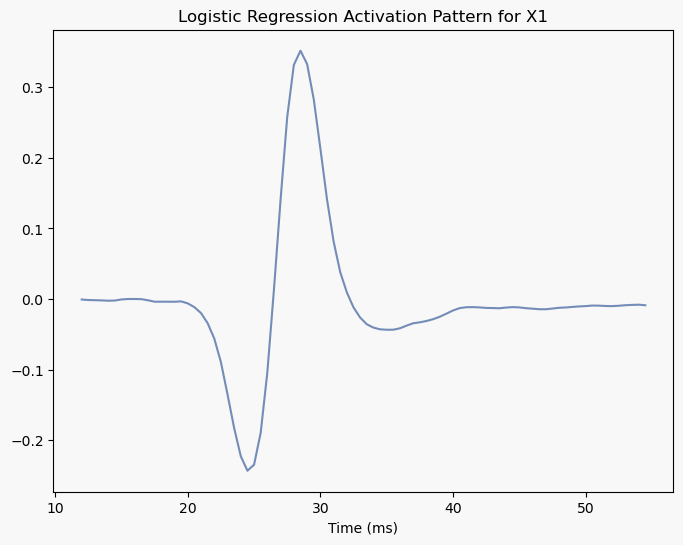

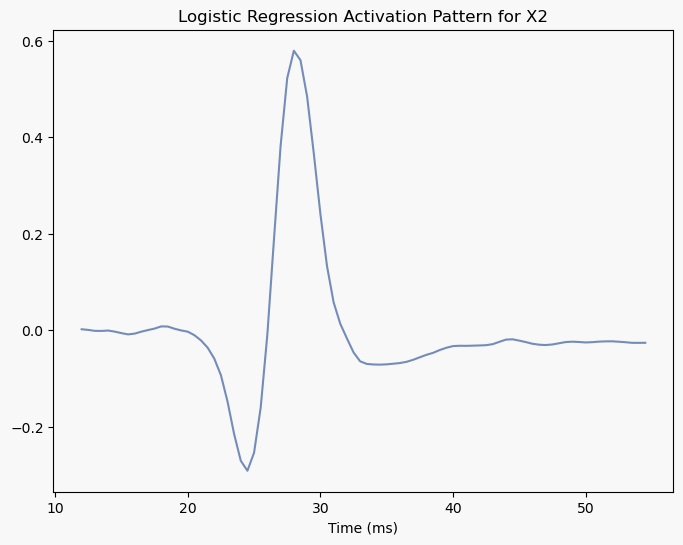

In [89]:
# compute the activation pattern of X1 and X2
A1 = covariance_matrix_X1 @ W1
A2 = covariance_matrix_X2 @ W2

# Define the color palette and background color
colorpalette = ['#2D3748', '#738CB8', '#FCA311', '#BFEDC1']
background_color = '#F8F8F8'

# Create the first figure
fig1, ax1 = plt.subplots(figsize=(8, 6), facecolor=background_color)

# Set the background color for the first figure
ax1.set_facecolor(background_color)

# Plot data on the first figure
ax1.plot(np.arange(X1.shape[0]) / 2000 * 1000 + 12, A1, color=colorpalette[1])
ax1.set_xlabel("Time (ms)")
#ax1.set_ylabel("Activation Pattern")
ax1.set_title('Logistic Regression Activation Pattern for X1')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Save the first figure as an image
fig1.savefig('LogisticActivationPattern_X1.png', dpi=300)  # Specify the desired filename and DPI

# Create the second figure
fig2, ax2 = plt.subplots(figsize=(8, 6), facecolor=background_color)

# Set the background color for the second figure
ax2.set_facecolor(background_color)

# Plot data on the second figure
ax2.plot(np.arange(X2.shape[0]) / 2000 * 1000 + 12, A2, color=colorpalette[1])
ax2.set_xlabel("Time (ms)")
#ax2.set_ylabel("Activation Pattern")
ax2.set_title('Logistic Regression Activation Pattern for X2')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Save the second figure as an image
fig2.savefig('LogisticActivationPattern_X2.png', dpi=300)  # Specify the desired filename and DPI


## Other

##### Differentiate

In [ ]:
# Diffentiate X, Note that the first element of each row will be lost after differentiation since there is no previous element to calculate the difference with.    X_diff = np.diff(X, axis=1)
X_diff = np.diff(X, axis=1)

##### FFT
For other representation of the data

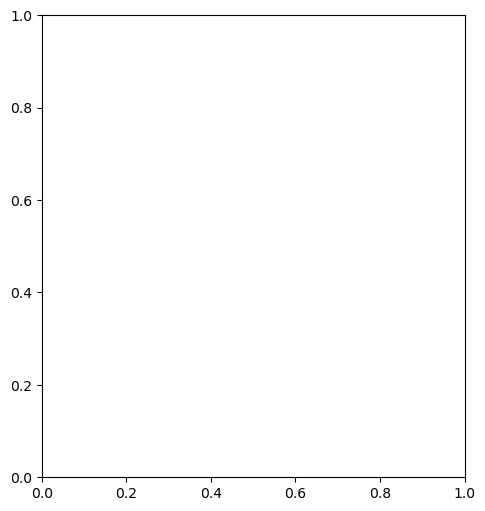

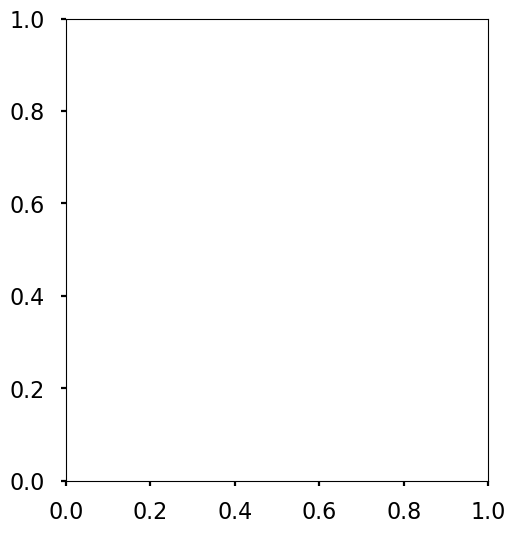

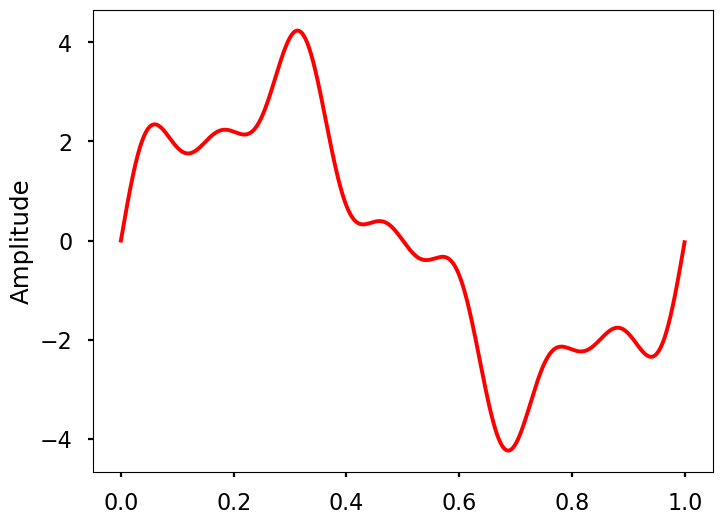

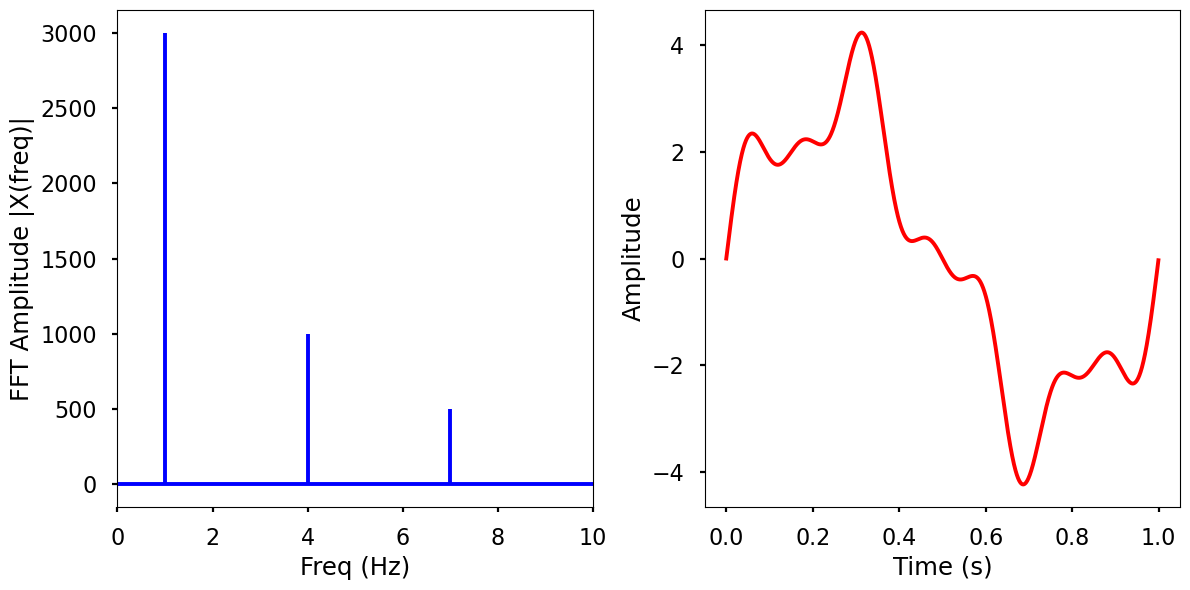

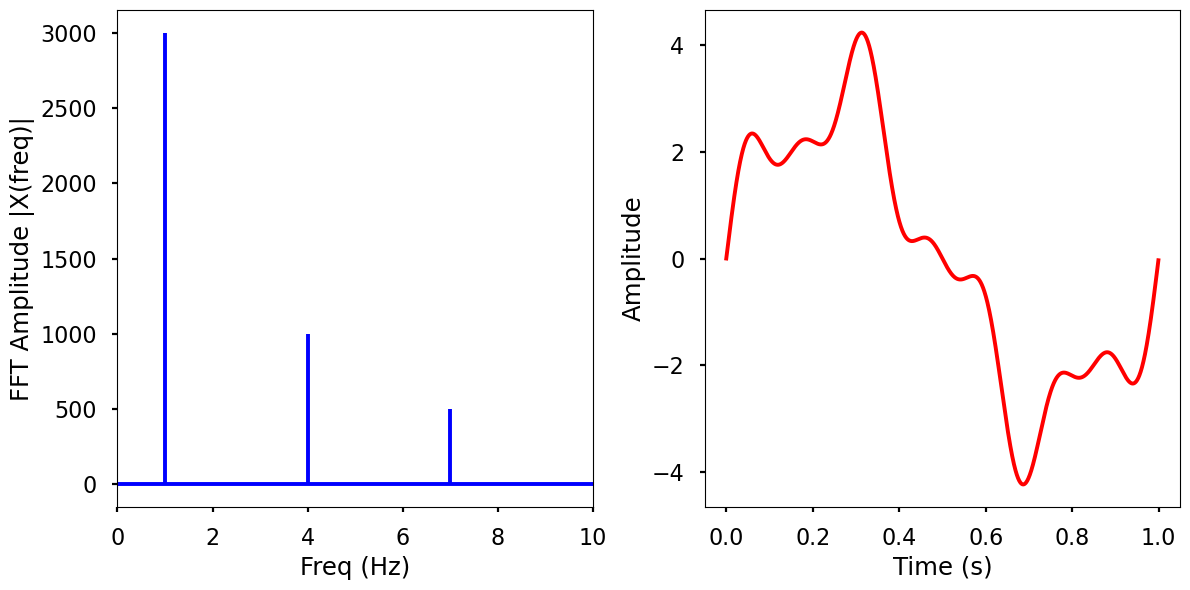

In [ ]:

from scipy.fftpack import fft, ifft
def FFT(X):
    plt.style.use('seaborn-poster')
    sr = 2000  # Sample rate (Hz)
    ts = 1.0/sr # sampling interval
    t = np.arange(0,1,ts)

    X = fft(X)
    N = len(X)
    n = np.arange(N)
    T = N/sr
    freq = n/T

    plt.figure(figsize = (12, 6))
    plt.subplot(121)

    plt.stem(freq, np.abs(X), 'b', \
             markerfmt=" ", basefmt="-b")
    plt.xlabel('Freq (Hz)')
    plt.ylabel('FFT Amplitude |X(freq)|')
    plt.xlim(0, 10)

    plt.subplot(122)
    plt.plot(t, ifft(X), 'r')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()
    '''

    for i in range(np.transpose(X).shape[0]):
        # Compute the power spectrum for signal i
        ps = np.abs(np.fft.rfft(np.transpose(X)[i])) ** 2
        
        # Compute the corresponding frequencies
        freqs = np.fft.rfftfreq(len(np.transpose(X)[i]), d=1/fs)
        
        # Plot the power spectrum for signal i
        plt.plot(freqs, ps)
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Power')
        plt.title(f'Power spectrum for signal {i+1}')
        plt.show()
    ''' 
    X_fft = np.fft.fft(X, axis=0)# virker ikke
    return X_fft


X_fft = FFT(X) #prøv også X_norm




# LOSO logistic regression

In [8]:
scores, mean_score, coefficients = models.k10fold_logreg_generel_model(X, y, onerow =False)#LOSO leave one subject out

print(scores)

[0.676056338028169, 0.6056338028169014, 0.7112676056338029, 0.7183098591549296, 0.6126760563380281, 0.7092198581560284, 0.7375886524822695, 0.6808510638297872, 0.6808510638297872, 0.6666666666666666]
